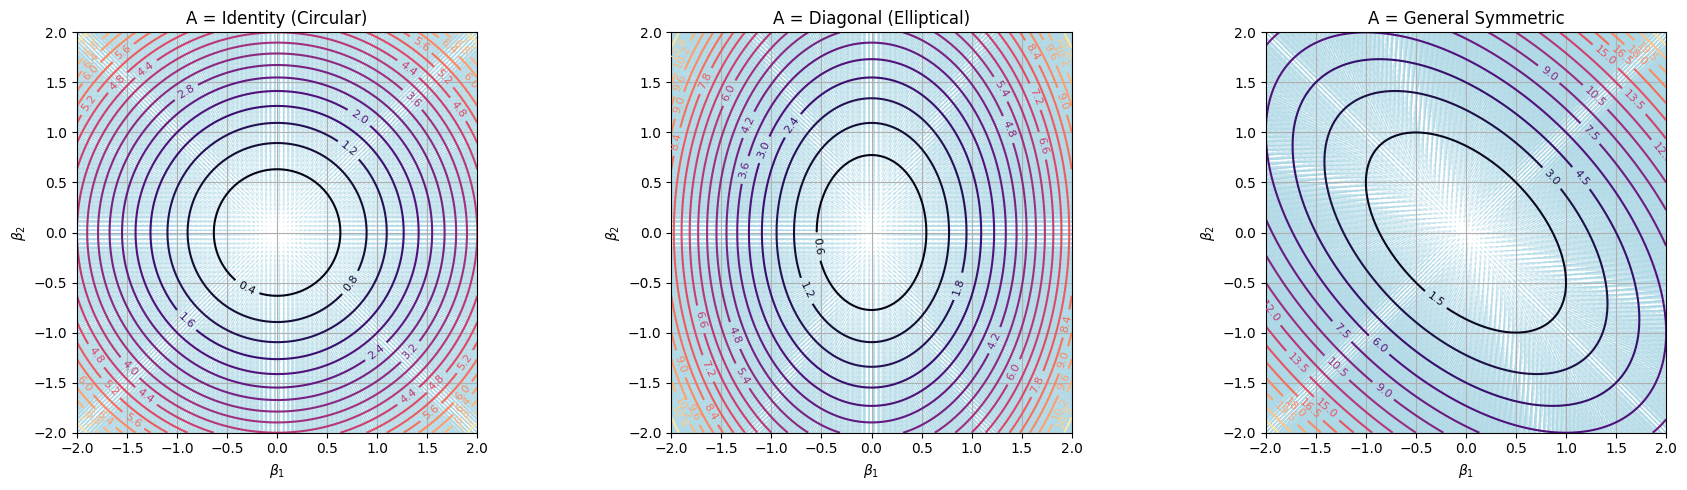

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the grid for beta1 and beta2
beta1 = np.linspace(-2, 2, 100)
beta2 = np.linspace(-2, 2, 100)
B1, B2 = np.meshgrid(beta1, beta2)

# Define a few A matrices
A_identity = np.array([[1, 0], [0, 1]])
A_diagonal = np.array([[2, 0], [0, 1]])
A_general = np.array([[2, 1], [1, 2]])

def quadratic_form(A, B1, B2):
    # Compute the quadratic form f = [b1 b2] A [b1; b2]
    return A[0,0]*B1**2 + (A[0,1]+A[1,0])*B1*B2 + A[1,1]*B2**2

# Compute the functions
F_identity = quadratic_form(A_identity, B1, B2)
F_diagonal = quadratic_form(A_diagonal, B1, B2)
F_general = quadratic_form(A_general, B1, B2)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

titles = ["A = Identity (Circular)", "A = Diagonal (Elliptical)", "A = General Symmetric"]
Fs = [F_identity, F_diagonal, F_general]
As = [A_identity, A_diagonal, A_general]

for ax, F, A, title in zip(axes, Fs, As, titles):
    # Contour plot of the quadratic form
    contour = ax.contour(B1, B2, F, levels=20, cmap='magma')
    ax.clabel(contour, inline=True, fontsize=8)
    
    # Compute and plot gradient vectors
    grad1 = 2*(A[0,0]*B1 + A[0,1]*B2)
    grad2 = 2*(A[1,0]*B1 + A[1,1]*B2)
    ax.quiver(B1, B2, grad1, grad2, color='lightblue', alpha=0.6, scale=40)

    ax.set_title(title)
    ax.set_xlabel(r'$\beta_1$')
    ax.set_ylabel(r'$\beta_2$')
    ax.set_aspect('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()
plt.savefig("quadratic_gradients.png", dpi=100, bbox_inches='tight', transparent=True)
